# Project 1 - Tehran House Price Prediction - Analyzing the dataset

- Analyzing the dataset


- Course Name :         Applied Machine Learning
- Course instructor:    Sohail Tehranipour
- Student Name :        Afshin Masoudi Ashtiani
- Project 1 -           Tehran House Price Prediction
- Date :                September 2024
- File(ipynb) :         2/5

## Step 1: Install required libraries

In [7]:
%pip install numpy pandas

Note: you may need to restart the kernel to use updated packages.


## Step 2: Import required libraries

In [8]:
import re
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

## Step 3: Load the dataset

In [9]:
# Load dataset
dataset_path = r'C:/Users/Afshin/Desktop/Project_1/datasets/cleaned_housePrice.csv'
# dataset_path = '/content/drive/My Drive/Applied Machine Learning/Project 1 : Tehran House Price Prediction/datasets/cleaned_housePrice.csv'
df = pd.read_csv(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884 entries, 0 to 2883
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       2884 non-null   int64  
 1   Room       2884 non-null   int64  
 2   Parking    2884 non-null   bool   
 3   Warehouse  2884 non-null   bool   
 4   Elevator   2884 non-null   bool   
 5   Address    2884 non-null   object 
 6   Price      2884 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 98.7+ KB


## Step 4: Analyze the dataset

- Set display option

In [18]:
# Set display option for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### Info of The dataset 

In [19]:
features = df.columns.tolist()
print(f'> Number of features : {df.shape[1]}')
print(f'> Number of samples  : {df.shape[0]}')
print(f'> Name of target : {features[-1]}')
print(f'> Name of features :')
[print(feature, end=' ') for feature in features[:-1]]
df.describe()

> Number of features : 7
> Number of samples  : 2884
> Name of target : Price
> Name of features :
Area Room Parking Warehouse Elevator Address 

,Area,Room,Price
count,2884.0000,2884.0000,2884.0000
mean,90.0846,1.9469,78021993074.5492
std,30.1310,0.6367,65387326799.5764
min,30.0000,0.0000,81810000.0000
25%,66.0000,2.0000,28406250000.0000
50%,86.0000,2.0000,56812500000.0000
75%,109.0000,2.0000,103626000000.0000
max,176.0000,5.0000,302242500000.0000


### Analysis of Parking, Warehouse and Elevator

- Percentage of houses with parking or not

In [23]:
df.Parking.value_counts(normalize= True) * 100

Parking
True    83.0791
False   16.9209
Name: proportion, dtype: float64

- Percentage of houses with Warehouse or not

In [24]:
df.Warehouse.value_counts(normalize= True) * 100

Warehouse
True    91.0541
False    8.9459
Name: proportion, dtype: float64

- Percentage of houses with Elevator or not

In [25]:
df.Elevator.value_counts(normalize= True) * 100

Elevator
True    78.3981
False   21.6019
Name: proportion, dtype: float64

### Analysis of Room

- Number of houses with Parking or not based on rooms

In [26]:
pd.crosstab(df.Parking, df.Room)

Room,0,1,2,3,4,5
Parking,,,,,,
False,6,232,227,19,1,3
True,2,390,1557,440,6,1


- Number of houses with Warehouse or not based on rooms

In [27]:
pd.crosstab(df.Warehouse, df.Room)

Room,0,1,2,3,4,5
Warehouse,,,,,,
False,3,100,136,13,3,3
True,5,522,1648,446,4,1


- Number of houses with Elevator or not based on rooms

In [28]:
pd.crosstab(df.Elevator, df.Room)

Room,0,1,2,3,4,5
Elevator,,,,,,
False,6,269,312,30,3,3
True,2,353,1472,429,4,1


- Number of houses with parking or not based on rooms

In [29]:
pd.crosstab([df.Parking, df.Warehouse, df.Elevator], df.Room)

Room                        0    1     2    3  4  5
Parking Warehouse Elevator                         
False   False     False     3   46    52    3  1  2
                  True      0   25    33    4  0  1
        True      False     3  118    66    6  0  0
                  True      0   43    76    6  0  0
True    False     False     0    5     4    1  0  0
                  True      0   24    47    5  2  0
        True      False     0  100   190   20  2  1
                  True      2  261  1316  414  2  0

### Analysis of Area

- Number of houses with under 85 (m*m) area

In [30]:
below_85 = df[df.Area <= 85]
print(f'> Number of houses with less  than 85 (m*m) area : {below_85.shape[0]}')
print(f'> Number of houses with upper than 85 (m*m) area : {df.shape[0] - below_85.shape[0]}')

> Number of houses with less  than 85 (m*m) area : 1415
> Number of houses with upper than 85 (m*m) area : 1469


- Percentage of under 85 (m*m) houses with parking or not

In [31]:
below_85.Parking.value_counts(normalize= True) * 100

Parking
True    71.8728
False   28.1272
Name: proportion, dtype: float64

- Percentage of under 85 (m*m) houses with Warehouse or not

In [32]:
below_85.Warehouse.value_counts(normalize= True) * 100

Warehouse
True    86.5724
False   13.4276
Name: proportion, dtype: float64

- Percentage of under 85 (m*m) houses with Elevator or not

In [33]:
below_85.Elevator.value_counts(normalize= True) * 100

Elevator
True    65.3004
False   34.6996
Name: proportion, dtype: float64

- Number of under 85 (m*m) houses with parking or not based on rooms

In [34]:
pd.crosstab([below_85.Parking, below_85.Warehouse, below_85.Elevator], below_85.Room)

Room                        0    1    2  3  4  5
Parking Warehouse Elevator                      
False   False     False     3   42   37  1  0  0
                  True      0   24   24  0  0  1
        True      False     3  116   47  2  0  0
                  True      0   43   55  0  0  0
True    False     False     0    5    3  0  0  0
                  True      0   24   26  0  0  0
        True      False     0   99  131  1  1  0
                  True      1  255  466  5  0  0

### Analysis of Address

In [35]:
addresses = df.Address.unique()
print(f'> Number of Addresses : {addresses.shape[0]}')
print(f'> Name of Addresses :')
for address in addresses[:10]:
    print(address) 

> Number of Addresses : 187
> Name of Addresses :
Shahran
Pardis
Shahrake Qods
Shahrake Gharb
North Program Organization
Andisheh
West Ferdows Boulevard
Narmak
Saadat Abad
Zafar


### Analysis of Price

- Set display option

In [40]:
# Set display option for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.f' % x)

- Average Price

In [41]:
print(f'> Average Price : {round(df.Price.mean())}')

> Average Price : 78021993075


In [42]:
mean_price_on_room = df.groupby('Room').Price.mean()
print(f'> Average Price based on Room :')
mean_price_on_room

> Average Price based on Room :


Room
0     8067375000
1    37636717536
2    73099112616
3   152344018382
4   105119357143
5   117573468750
Name: Price, dtype: float64

In [43]:
mean_price_on_room_parking = df.groupby(['Room', 'Parking']).Price.mean().reset_index()
print(f'> Average Price based on Room and Parking :')
mean_price_on_room_parking

> Average Price based on Room and Parking :


,Room,Parking,Price
0,0,False,9063487500
1,0,True,5079037500
2,1,False,24161151433
3,1,True,45652951731
4,2,False,31972523293
5,2,True,79095089351
6,3,False,52769244079
7,3,True,156643838182
8,4,False,140895000000
9,4,True,99156750000


In [44]:
mean_price_on_room_parking_warehouse_elevator = df.groupby(['Room', 'Parking', 'Warehouse', 'Elevator']).Price.mean().reset_index()
print(f'> Average Price based on Room and Parking, Warehouse and Elevator :')
mean_price_on_room_parking_warehouse_elevator

> Average Price based on Room and Parking, Warehouse and Elevator :


,Room,Parking,Warehouse,Elevator,Price
0,0,False,False,False,6688725000
1,0,False,True,False,11438250000
2,0,True,True,True,5079037500
3,1,False,False,False,20899886087
4,1,False,False,True,31434129000
5,1,False,True,False,22834022225
6,1,False,True,True,27063361047
7,1,True,False,False,24588450000
8,1,True,False,True,35117700000
9,1,True,True,False,32948182125


## Step 5: Visualize the data

- Plot univariate or bivariate histograms to show distributions of datasets

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def hist_plot(data, colour="skyblue"):
    plt.figure(figsize=(8,5))
    sns.set_theme(style="ticks")
    sns.histplot(data, bins=30, kde=True, color=colour)
    plt.tight_layout()
    plt.grid()
    plt.show()

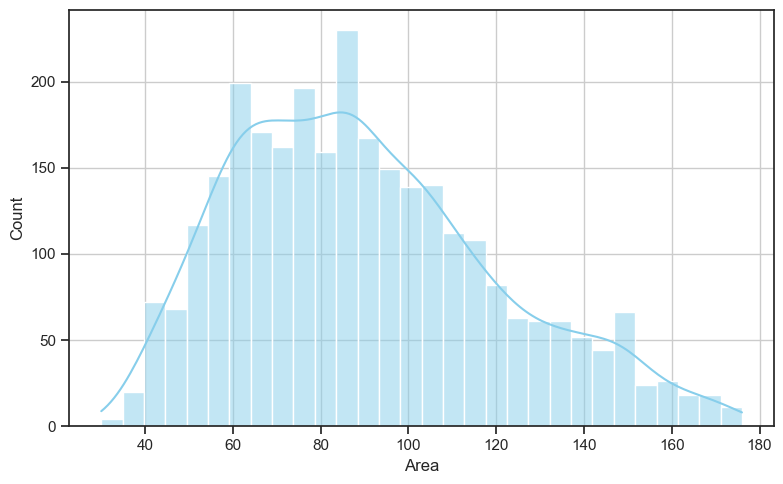

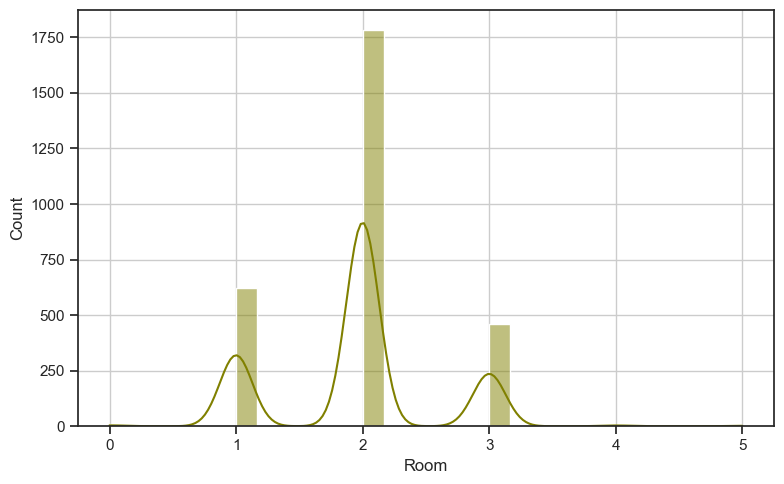

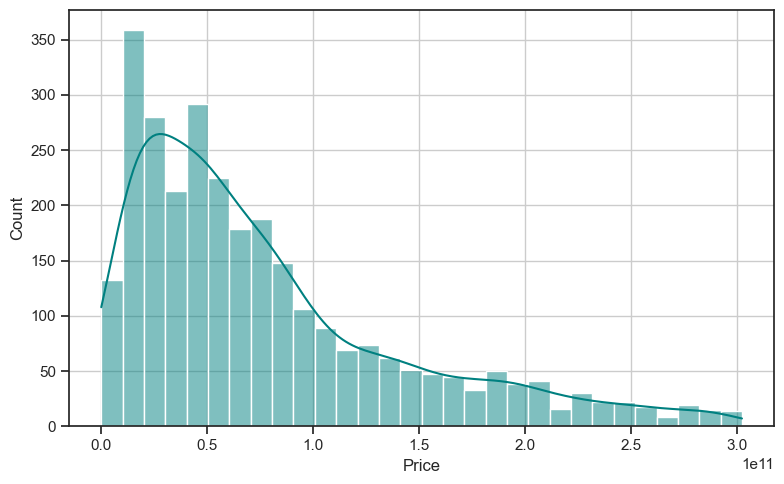

In [46]:
hist_plot(data=df.Area, colour="skyblue")
hist_plot(data=df.Room, colour="olive")
hist_plot(data=df.Price, colour="teal")

- The correlation between the features

<Axes: >

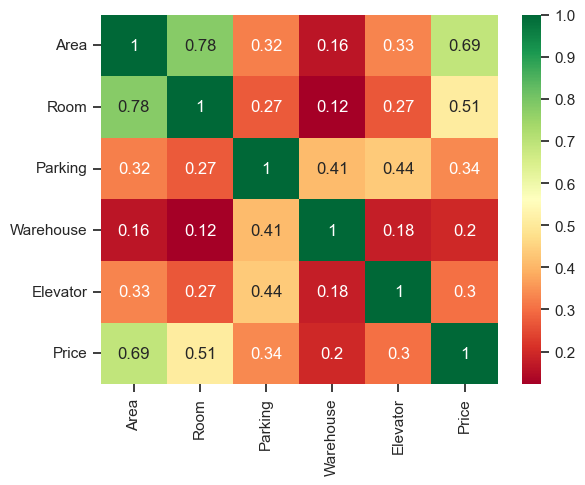

In [47]:
sns.heatmap(df.drop(['Address'], axis=1).corr(), annot=True, cmap="RdYlGn")

- Parking, Warehouse and Elevator Distributions

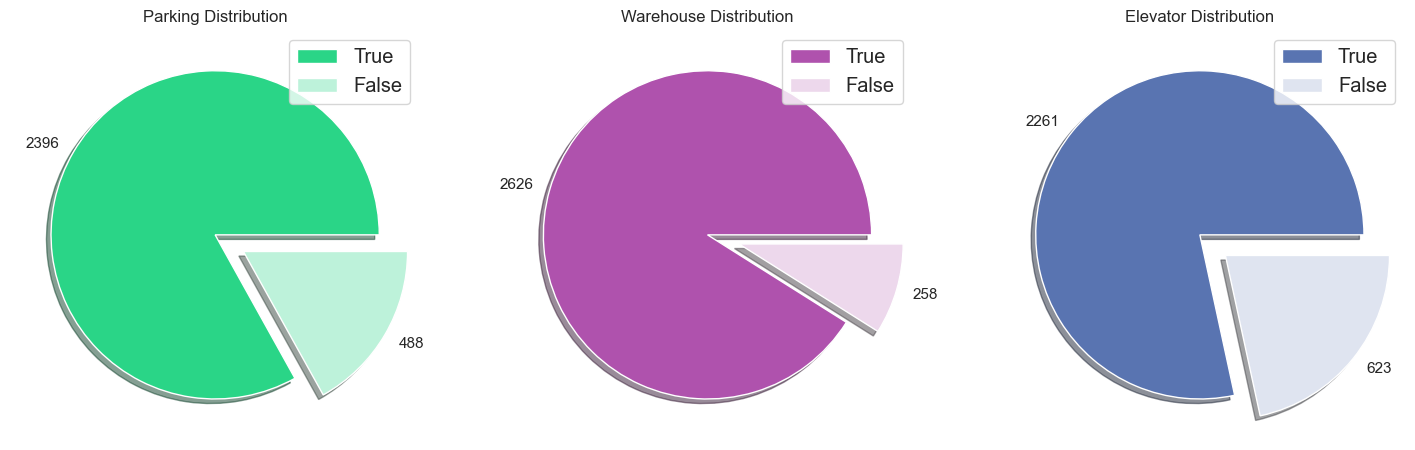

In [48]:
fig, ax = plt.subplots(ncols=3, figsize=(18,8))
colours = [['#2ad587', '#bdf2da'], ['#af52ad', '#edd8ec'], ['#5974b1', '#dfe4f0']]
explode = [0.0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(len(columns)):
    data = df[columns[i]].value_counts()
    ax[i].pie(data, labels=data.values, explode=explode, colors=colours[i], shadow=True)
    ax[i].legend(labels=data.index, fontsize='large')
    ax[i].set_title(f'{columns[i]} Distribution')


- The addresses with the most houses

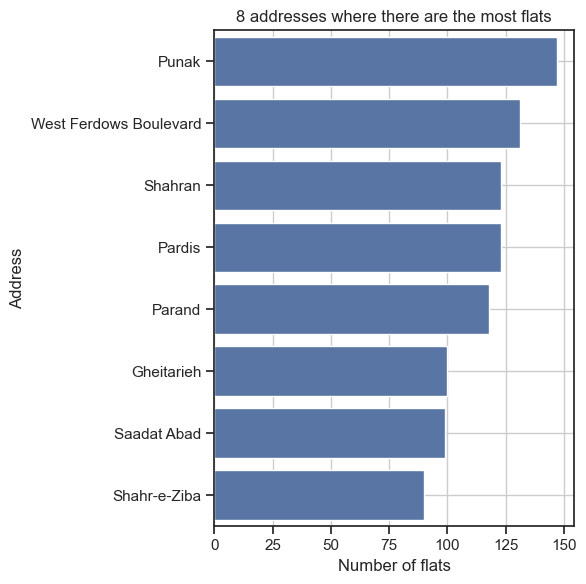

In [49]:
addresses8 = df.Address.value_counts().copy()[:8]
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=addresses8.values, y=addresses8.index, ax=ax)
plt.xlabel('Number of flats')
plt.title('8 addresses where there are the most flats')
plt.tight_layout()
plt.grid()
plt.show()

- The most expensive flats in the 10 top addresses

In [50]:
df.sort_values('Price', ascending=False)[['Address', 'Area', 'Price']].head(10)

,Address,Area,Price
1563,Gheitarieh,133,302242500000
1617,Gheitarieh,153,302242500000
1621,Velenjak,107,299970000000
1453,Pasdaran,155,299401875000
1078,Kamranieh,160,298152000000
517,Shahrake Gharb,115,295425000000
1464,Gheitarieh,150,295425000000
1622,Gheitarieh,153,295425000000
2561,Gheitarieh,155,295425000000
192,Pasdaran,153,295425000000


In [51]:
print(f'>> Skewness of features :')
print(f'> Area  : {df.Area.skew():.4f}')
print(f'> Room  : {df.Room.skew():.4f}')
print(f'> Price : {df.Price.skew():.4f}')

>> Skewness of features :
> Area  : 0.5649
> Room  : 0.1660
> Price : 1.3051
